Görüntü ortalaması genel olarak parlaklık değerini verir.
Görüntünün histogramınınstandart sapması bize görüntünün kontrastı ile ilgili bilgi verir.

Aşağıdaki ikinci görselde görüleceği üzere bir görüntü puslu (konstrastı düşük) ise standart sapması da histogram grafiğinde görüleceği üzere dardır.

Görüntü 3. resimdeki gib ton bakımından zengin ise standart sapması geniştir, konstrastı fazladır.

Bu dediklerimiz her zaman doğru çıkmayabilir.
<img src = "1.1.JPG">

**Kontrast:** Histogramın standar sapması üzerinden hesaplanır.

**Parlaklık:** Histogramın ortalama değeri ile orantılıdır.

In [1]:
import numpy as np
import cv2  as cv
from matplotlib import pyplot as plt

In [3]:
fig = plt.figure
subplot = plt.subplot
imshow = plt.imshow
imread = cv.imread

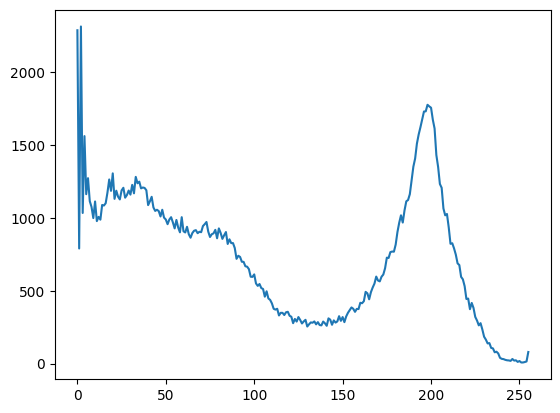

In [43]:
I = imread("../images/F.jpg", 0)

# 2. parametre  hangi renk kanalı olduunu seçmemizi sağlıyor
# 3. parametre görseldeki istediğimiz belli bir bölgeyi seçmemizi sağlıyor, None yazılırsa tüm görsel seçilecektir.
# 4. parametre ne kadar değerin hesaplanacağonı söylüyor. quantalama. 256 yaptığımızda artık virgüllü değerleri hesaplamıyor, eğer 500 yaparsak virgüllü değerleri de histograma ekler.
# 0 - 256 aralığını 256 ya bölüyor
# 5. parametre hangi aralıkta hesaplama yapılacağını söylüyor
hist = cv.calcHist( [I], [0] ,  None, [256], [0,256])
fig()
plt.plot(hist)


In [44]:
#Elimizdeki görüntünün genel bir parlaklık değerini bulmak için

I_ort = np.mean(I)
I_ort

105.08320855614973

In [45]:
#Varyans Hesabı
I_std = np.sqrt(np.sum((I-I_ort)**2)*1/(I.shape[0] * I.shape[1]))
I_std

73.64452346029861

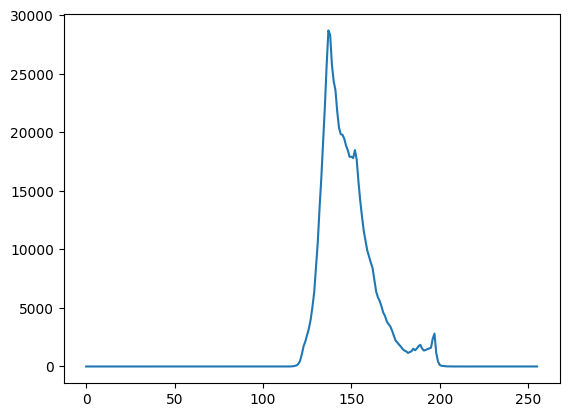

In [50]:
B = imread("../images/B.jpg", 0)
hist = cv.calcHist( [B], [0] ,  None, [256], [0,256])
fig()
plt.plot(hist)

In [51]:
#Histogramda standart sapmanın dar olduğunu gözlemleyebiliyoruz.

B_ort = np.mean(B)
I_std = np.sqrt(np.sum((B-B_ort)**2)*1/(B.shape[0] * B.shape[1]))
I_std
# Standart sapma hesapladığımız gibi düşük çıkıyor.

14.381449846141143

<h3>Kontrast Dengeleme</h3>

Amaç: Acaba ben dar bir histograma sahip olduğum görüntüyü geniş bir histograma dönüştürebilir miyim? Nasıl dönüştürürüm?

(<Axes: >, <matplotlib.image.AxesImage at 0x1571448be80>)

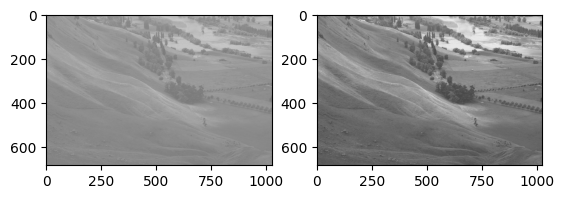

In [58]:
B_zm = B - np.mean(B) #Zero mean elde ettik
B_nr = B_zm / np.max(np.abs(B_zm)) #Maximum olan değere böldük

B_128 = 128*B_nr

B_y0 = np.uint8(B_128 + 127)

fig()
subplot(1,2,1), imshow(B, cmap = "gray", vmin = 0, vmax = 255)
subplot(1,2,2), imshow(B_y0, cmap = "gray", vmin = 0, vmax = 255)


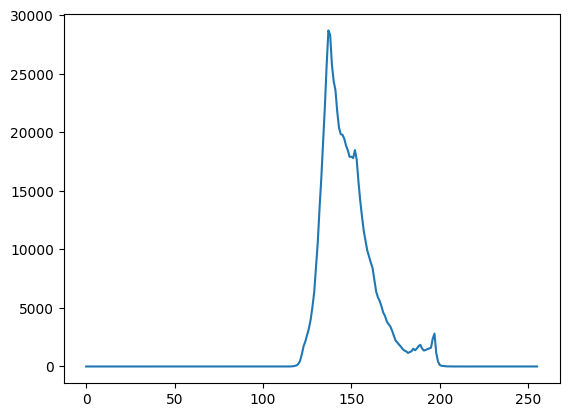

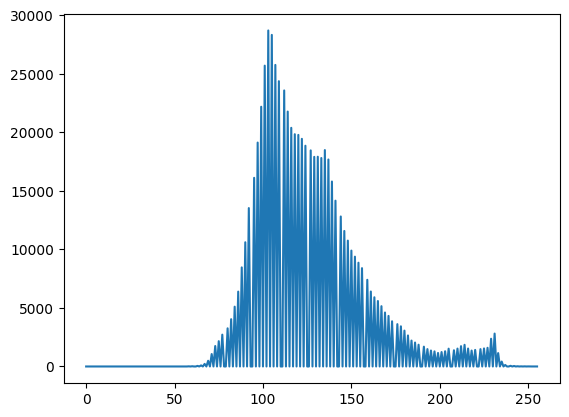

In [61]:
histB = cv.calcHist( [B_y0], [0] ,  None, [256], [0,256])
fig()
plt.plot(hist)
fig()
plt.plot(histB)
